Dittenber, Benjamin: Grade=95/100

# Introduction:
In this lab, we set out to learn about statistics and probability! We were to use our 'programming prowess' to numerically calculate the binomial probability, which we learned about in lecture. We used python to simulate a coin flipping experiment where you flip many coins over many trials. We compared this to the analytical values, and then we considered an 'unfair' coin. This unfair coin actually modeled the Poisson distribution! We compared it to analytical Poisson distribution, and then we calculated the Variance and Chi Square values, in order to determine how close and accurate our numerical data was.

# Theory:

### Binomial Distribution = $P(N,n) = {N! \over n!(N-n!)}  p^n (1-p)^{(N-n)}$

Binomial distribution calculates distribution of successes in a sequence of n independent yes/no experiments.

### Poisson Distribution = $P(N,n) = {\lambda^n e^{-\lambda}\over n!}$

Poisson Distribution is the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event.



The variables we have to define are the number of trials and the requirements for success, we would ask the user how many trials they want to run, and which element counts as a success (heads or tails). The intermediate values that we would not give the user would be the probability of success.

# Problem Number One:

In problem one, the main objective was to set up our experiment. I personally opted to code it so that you could input however many trials and coins you would like. The loop was set up to pick randomly from 0 or 1, and only add to the Counts (which are our successes) when it gets heads. Next I define a function for the Binomial Distribution, where x is little n, which is a vector of length N. N is the number of coins. I plot both my experimental data, and the expected curve of the Binomial distribution, and if you do enough trials, the data lines up closely. Under the Binomial Function I calculate the expectation value, which is the probabilistic expected result of an experiment.

please enter the number of trials: 100000
Please enter the number of coins: 20
E(x): 10.01187


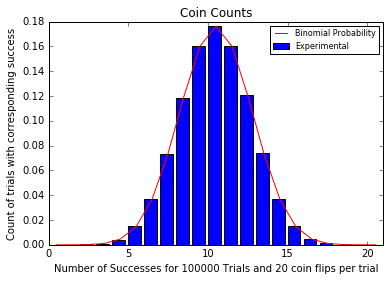

In [55]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np
import scipy.misc as scm

Trials = int(raw_input('please enter the number of trials: '))
CoinNum = int(raw_input('Please enter the number of coins: '))


counts = np.zeros(CoinNum + 1)
for i in range(0,(Trials)):
    draw = np.random.randint(2, size=CoinNum)
    heads_count = len(draw[(np.where(draw==1))])
    Tails_count = len(draw[(np.where(draw==0))])
    counts[heads_count] = counts[heads_count] + 1

def PNx(N):
    p = 0.5
    x = (np.arange(N+1.))
    PNx = scm.factorial(N)/((scm.factorial(x)*scm.factorial(N-x)))*((p)**N)
    return PNx

P_x = counts/Trials
x_vec = np.arange(CoinNum + 1)
Sum = sum(P_x * x_vec)


print ('E(x): ' + str(Sum))

    
pl.figure()
pl.bar(np.arange(CoinNum + 1), P_x, label = 'Experimental')
pl.plot(np.arange(CoinNum +1)+0.5, PNx(CoinNum),'r', label = 'Binomial Probability')
pl.title('Coin Counts')
pl.legend(fontsize = 8)
pl.ylabel('Count of trials with corresponding success')
pl.xlabel('Number of Successes for ' + str(Trials) + ' Trials and ' + str(CoinNum) + ' coin flips per trial')
pl.xlim(0,CoinNum + 1)

pl.show()

# Problem Number Two:

The next mountain to climb was to make a coin, that is intrinsically unfair to flip. In doing this, I also made the probability of success inputable, and I now have the drawing for a float inbetween at random, and have the counts added when draw is less than the probabilistic of success. Now I have a trick coin!

Next I define both the Binomial Function and the Poisson Function. I plotted the data, with both functions overlayed. Using the inputed probability, they are all very similar. It's cool because for homework we worked out how to rederive one into the other.

Finally, we did some statistics that will be extremely helpful in the future, and in the field of Astronomy. We calculated the Variance of the data, which is how far the data is spread out from the mean. Variance is calculated with:

### Variance = ${<x^2> - <x>^2}$

Not seen in this lab, but in other instances we could calculate the Standard Deviation of the data as well.
We also calculated Chi Squared as well, which is how close the observed data is to the expected data.

### Chi Square = ${\sum((x_{obs} - x_{ex})^2)}$

please enter the number of trials: 10000
Please enter the number of coins: 100
Please enter the probability of success: .01
E(x): 1.0119
Variance: 1.01275839
5.80213014989e-05


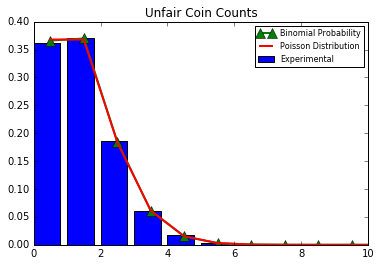

In [56]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np
import scipy.misc as scm 
from scipy.stats import chisquare
Trials = int(raw_input('please enter the number of trials: '))
CoinNum = int(raw_input('Please enter the number of coins: '))
p = float(raw_input('Please enter the probability of success: '))


counts = np.zeros(CoinNum + 1)
for i in range(0,(Trials)):
    draw = np.random.uniform(0,1,size=CoinNum)
    heads_count = len(draw[(np.where(draw < p))])
    Tails_count = len(draw[(np.where(draw > p))])
    counts[heads_count] = counts[heads_count] + 1

def PNx(N):
    x = (np.arange(N+1.))
    PNx = scm.factorial(N)/((scm.factorial(x)*scm.factorial(N-x)))*((p)**x)*((1-p)**(N-x))
    return PNx
def Poisson(N):
    x = (np.arange(N+1.))
    A = N*p
    POIS = (A**(x))*np.exp(-A)/scm.factorial(x)
    return POIS

P_x = counts/Trials
x_vec = np.arange(CoinNum + 1)
E_x = sum(P_x * x_vec)

P_x = counts/Trials
x_vec = np.arange(CoinNum + 1)
Sum = sum(P_x * x_vec)
Sum2 = Sum**2

P_x = counts/Trials
x_vec = np.arange(CoinNum + 1)
Sum = sum(P_x * x_vec**2)

Var = Sum - Sum2

print ('E(x): ' + str(E_x))
print ('Variance: ' + str(Var))

Chi = sum(((counts/Trials)-Poisson(CoinNum))**2)
print (Chi)
    
pl.figure()
pl.bar(np.arange(CoinNum + 1), counts/Trials, label = 'Experimental')
pl.plot(np.arange(CoinNum +1)+0.5, PNx(CoinNum),'g^-',linewidth = 2, markersize = 10, label = 'Binomial Probability')
pl.plot(np.arange(CoinNum +1)+0.5, Poisson(CoinNum),'r',linewidth = 2, label = 'Poisson Distribution')
pl.title('Unfair Coin Counts')
pl.legend(fontsize = 8)
#pl.ylabel('Count of trials with corresponding success')
#pl.xlabel('Number of Successes for ' + str(Trials) + ' Trials and ' + str(CoinNum) + ' coin flips per trial')
pl.xlim(0,10)

pl.show()

# Conclusion:

The lab was super helpful. Specifically the last portion was actually majorly helpful to me, as I will probably be using it in my research. The ability to tell how close your data is to the mean, or how closely it follows mathmatical expectations gives a research project more credibility, and also allows for further analysis. I was shown the probabalistic power of the two distribution functions we used, and how we could possibly use them in the real world. Fortunately, along the way I also gained a bit more knowledge of python, which is always dope. Future Ben, if you read this, I want you to know that sometimes it's better to do the actual calculation instead of using a built in function, it can help in your understanding of the topic and data, and quite possibly of the code, which is, again, always dope.

# Donezo.